In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import os

data_path = "/content/drive/MyDrive/uli_dataset-main"
print(os.listdir(data_path))


Mounted at /content/drive
['README.md', 'LICENSE', 'training', 'testing']


Loading libraries

In [ ]:
!pip uninstall -y numpy pandas
!pip install numpy==1.24.4 pandas --force-reinstall --no-cache-dir



Found existing installation: numpy 1.24.4
Uninstalling numpy-1.24.4:
  Successfully uninstalled numpy-1.24.4
Found existing installation: pandas 2.2.3
Uninstalling pandas-2.2.3:
  Successfully uninstalled pandas-2.2.3
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 28.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 192.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 197.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.9/229.9 kB 209.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 509.2/509.2 kB 242.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 347.8/347.8 kB 236.0 MB/s eta 0:00:00
  Attempting uninstall: pytz
    Found existing installation: pytz 2025.2
    Uninstalling pytz-2025.2:
      Successfully uninstalled pytz-2025.2
  Attempting uninstall: tzdata
    Found existing installation: tzdata 2025.2
    Uninstalling tzdata-2025.2:
      Successfully uninstalled tzdata-202

In [ ]:
import pandas as pd
import os


In [ ]:
train_path = os.path.join(data_path, "training")
print(os.listdir(train_path))
file_path="/content/drive/MyDrive/uli_dataset-main/training/train_en_l1.csv"
df = pd.read_csv(file_path)



['train_en_l2.csv', 'train_en_l1.csv', 'train_ta_l2.csv', 'train_hi_l2.csv', 'train_en_l3.csv', 'train_ta_l3.csv', 'train_hi_l1.csv', 'train_hi_l3.csv', 'train_ta_l1.csv']


# EDA

In [ ]:
df.info() #Checking Basic Information


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6531 entries, 0 to 6530
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   text    6531 non-null   object 
 1   key     6531 non-null   object 
 2   en_a1   131 non-null    float64
 3   en_a2   1273 non-null   object 
 4   en_a3   1847 non-null   object 
 5   en_a4   1074 non-null   object 
 6   en_a5   1799 non-null   float64
 7   en_a6   922 non-null    float64
dtypes: float64(3), object(5)
memory usage: 408.3+ KB


In [ ]:
df.isnull().sum() #check missing values

,0
text,0
key,0
en_a1,6400
en_a2,5258
en_a3,4684
en_a4,5457
en_a5,4732
en_a6,5609


In [ ]:
df['key'].value_counts()


,count
key,
question_1,6531


In [ ]:
df.duplicated().sum() # Checking for Duplicate Entries


0

In [ ]:
df['text_length'] = df['text'].apply(lambda x: len(str(x).split()))
df['text_length'].describe()  # Text Length Distribution


,text_length
count,6531.000000
mean,19.626091
std,14.389788
min,1.000000
25%,8.000000
50%,15.000000
75%,29.000000
max,62.000000


In [ ]:
import re
df['special_chars'] = df['text'].apply(lambda x: len(re.findall(r'[^A-Za-z0-9\s]', str(x))))
df['special_chars'].describe()

,special_chars
count,6531.000000
mean,7.126321
std,5.610655
min,0.000000
25%,3.000000
50%,6.000000
75%,9.000000
max,88.000000


In [ ]:

for col in df.columns[2:8]:
    print(f"Column: {col} - Unique Values: {df[col].unique()}")
df.iloc[:, 2:8] = df.iloc[:, 2:8].replace(['NL'], None).astype(float).fillna(0)

df['text_length'] = pd.to_numeric(df['text_length'], errors='coerce').fillna(0).astype(int)
df['special_chars'] = pd.to_numeric(df['special_chars'], errors='coerce').fillna(0).astype(int)

df[['en_a2', 'en_a3', 'en_a4']] = df[['en_a2', 'en_a3', 'en_a4']].apply(pd.to_numeric, errors='coerce').fillna(0)
print(df.dtypes)


Column: en_a1 - Unique Values: [nan  0.  1.]
Column: en_a2 - Unique Values: [nan '0.0' '1.0' 'NL']
Column: en_a3 - Unique Values: [nan '0.0' '1.0' 'NL']
Column: en_a4 - Unique Values: [nan '1.0' '0.0' 'NL']
Column: en_a5 - Unique Values: [nan  0.  1.]
Column: en_a6 - Unique Values: [ 0. nan  1.]
text              object
key               object
en_a1            float64
en_a2            float64
en_a3            float64
en_a4            float64
en_a5            float64
en_a6            float64
text_length        int64
special_chars      int64
dtype: object


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.



===== EDA for train_en_l1.csv =====

Dataset shape: (6531, 8)

Data types:
 text      object
key       object
en_a1    float64
en_a2     object
en_a3     object
en_a4     object
en_a5    float64
en_a6    float64
dtype: object

Memory usage:
 Index        132
text     1747525
key       437577
en_a1      52248
en_a2     244634
en_a3     260699
en_a4     239063
en_a5      52248
en_a6      52248
dtype: int64

Sample rows:
                                                    text         key  en_a1  \
6421  like what ??       how to be a whore ? i was a...  question_1    NaN   
1980  <handle replaced>According to Zee News it's Mo...  question_1    NaN   
3079  <handle replaced>In the name of protest, they ...  question_1    NaN   

     en_a2 en_a3 en_a4  en_a5  en_a6  
6421   NaN   NaN   NaN    0.0    NaN  
1980   NaN   0.0   NaN    NaN    NaN  
3079   NaN   0.0   NaN    NaN    NaN  

Missing values:
 text        0
key         0
en_a1    6400
en_a2    5258
en_a3    4684
en_a4    5457
en_a5

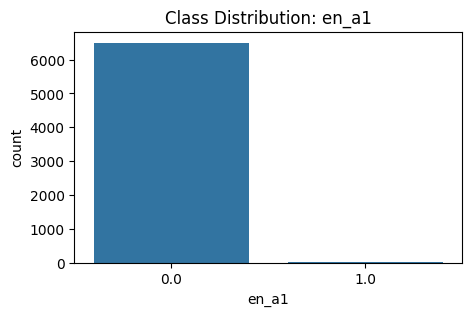


--- en_a2 ---
en_a2
0.0    6339
1.0     192
Name: count, dtype: int64


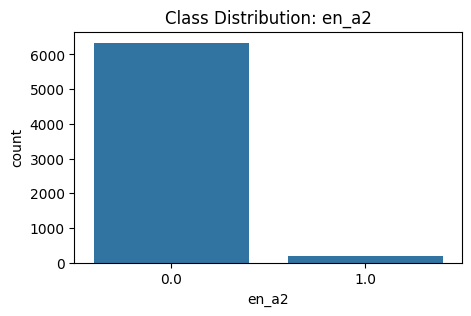


--- en_a3 ---
en_a3
0.0    5993
1.0     538
Name: count, dtype: int64


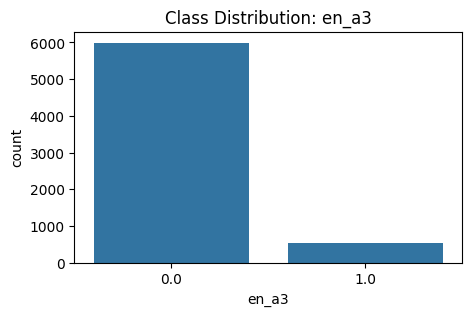


--- en_a4 ---
en_a4
0.0    6405
1.0     126
Name: count, dtype: int64


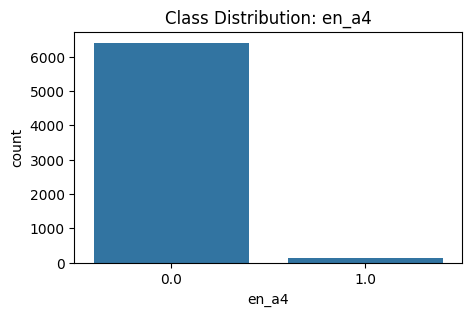


--- en_a5 ---
en_a5
0.0    6234
1.0     297
Name: count, dtype: int64


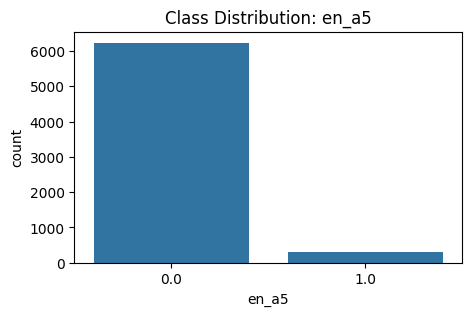


--- en_a6 ---
en_a6
0.0    6274
1.0     257
Name: count, dtype: int64


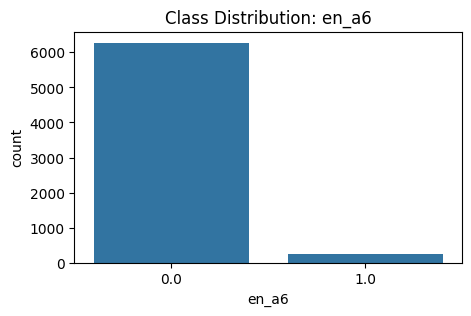

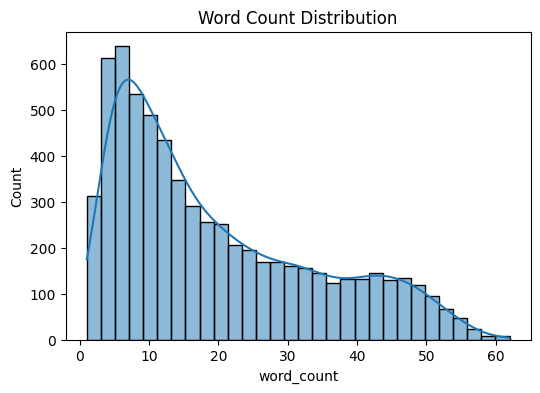

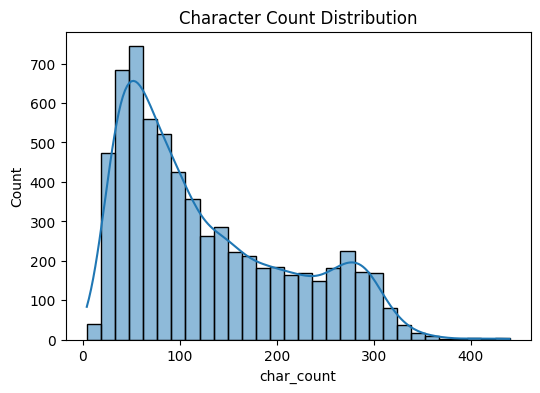

Avg stopwords per text: 6.8107487367937525


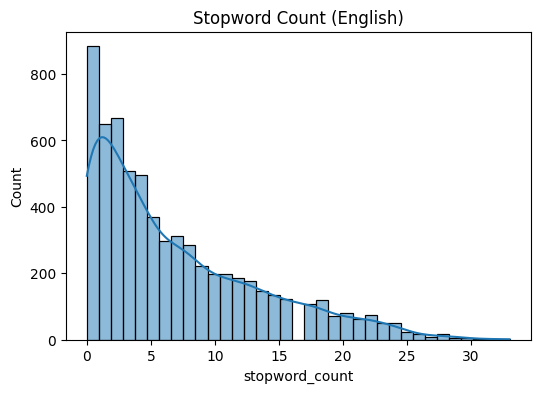

Exact duplicates: 0
Vocabulary size for EN: 23877

===== EDA for train_en_l2.csv =====

Dataset shape: (6531, 8)

Data types:
 text      object
key       object
en_a1    float64
en_a2     object
en_a3     object
en_a4     object
en_a5    float64
en_a6    float64
dtype: object

Memory usage:
 Index        132
text     1747525
key       437577
en_a1      52248
en_a2     244634
en_a3     260699
en_a4     239063
en_a5      52248
en_a6      52248
dtype: int64

Sample rows:
                                                    text         key  en_a1  \
5838  Imma fuck yo ass up bitch!!!!!!!!!!!!!!!!!!!!!...  question_2    NaN   
4896            <handle replaced>Your keeping very well  question_2    NaN   
4562  <handle replaced>Where is that #JhanseyKiRani(...  question_2    NaN   

     en_a2 en_a3 en_a4  en_a5  en_a6  
5838   NaN   NaN   NaN    1.0    NaN  
4896   NaN   0.0   NaN    NaN    NaN  
4562   1.0   NaN   NaN    NaN    NaN  

Missing values:
 text        0
key         0
en_a1    64

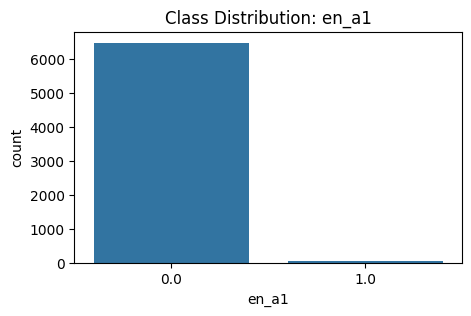


--- en_a2 ---
en_a2
0.0    6347
1.0     184
Name: count, dtype: int64


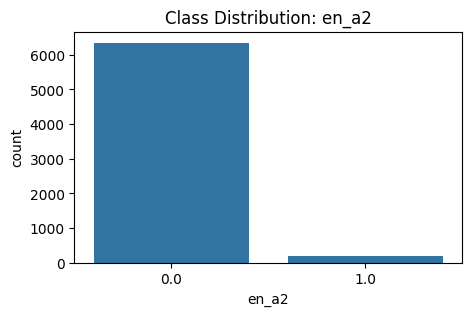


--- en_a3 ---
en_a3
0.0    5901
1.0     630
Name: count, dtype: int64


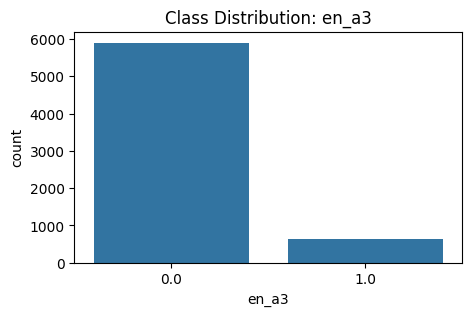


--- en_a4 ---
en_a4
0.0    6363
1.0     168
Name: count, dtype: int64


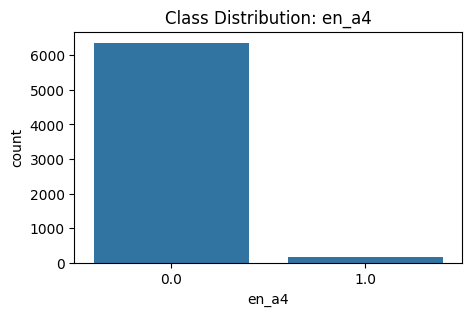


--- en_a5 ---
en_a5
0.0    5839
1.0     692
Name: count, dtype: int64


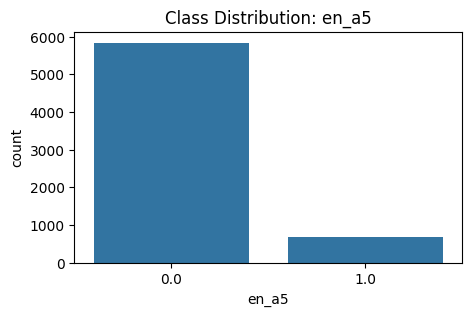


--- en_a6 ---
en_a6
0.0    5984
1.0     547
Name: count, dtype: int64


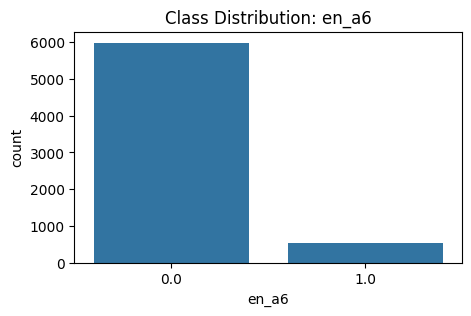

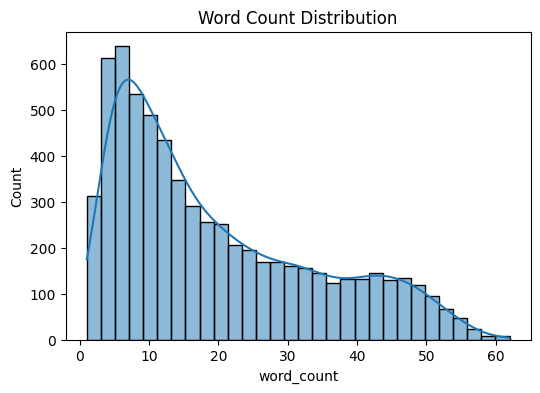

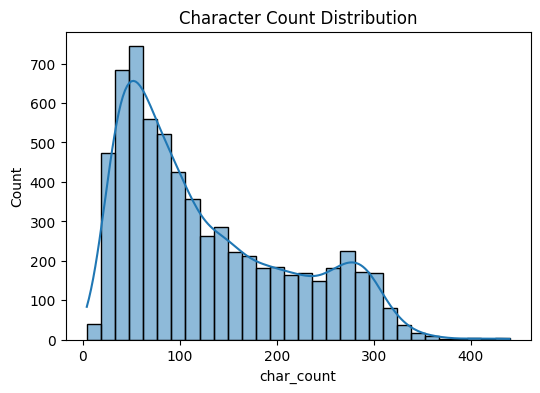

Avg stopwords per text: 6.8107487367937525


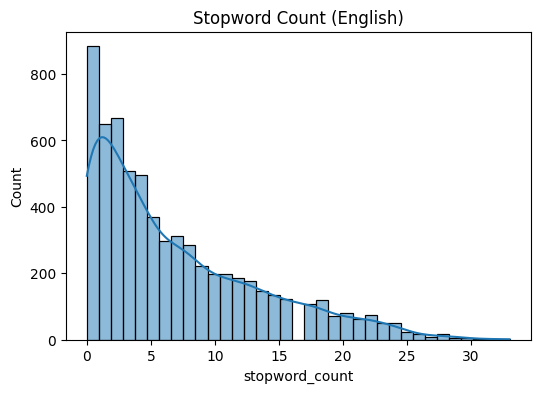

Exact duplicates: 0
Vocabulary size for EN: 23877

===== EDA for train_en_l3.csv =====

Dataset shape: (6531, 8)

Data types:
 text      object
key       object
en_a1    float64
en_a2     object
en_a3     object
en_a4     object
en_a5    float64
en_a6    float64
dtype: object

Memory usage:
 Index        132
text     1747525
key       437577
en_a1      52248
en_a2     244633
en_a3     260699
en_a4     239063
en_a5      52248
en_a6      52248
dtype: int64

Sample rows:
                                                    text         key  en_a1  \
983   <handle replaced><handle replaced>Both of you ...  question_3    NaN   
4572  <handle replaced>Whitei pup with beautiful <ha...  question_3    NaN   
3022  <handle replaced>If Muslims disappear from Ind...  question_3    NaN   

     en_a2 en_a3 en_a4  en_a5  en_a6  
983    NaN   NaN   0.0    NaN    NaN  
4572   NaN   0.0   NaN    NaN    NaN  
3022   NaN   NaN   NaN    0.0    NaN  

Missing values:
 text        0
key         0
en_a1    64

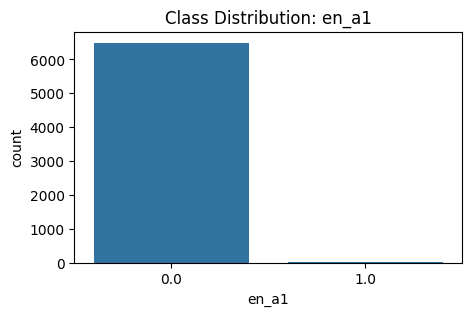


--- en_a2 ---
en_a2
0.0    6122
1.0     409
Name: count, dtype: int64


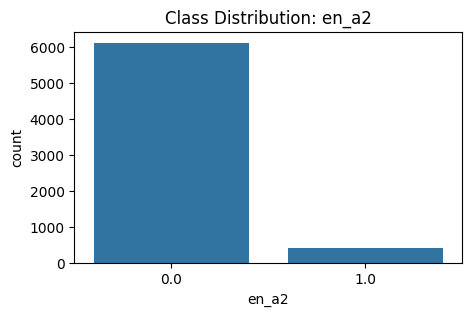


--- en_a3 ---
en_a3
0.0    5701
1.0     830
Name: count, dtype: int64


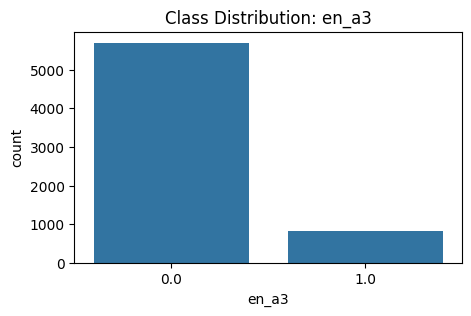


--- en_a4 ---
en_a4
0.0    6401
1.0     129
0.5       1
Name: count, dtype: int64


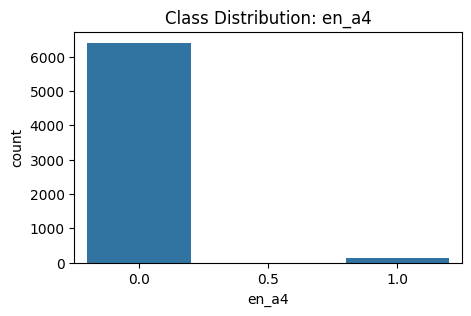


--- en_a5 ---
en_a5
0.0    5988
1.0     543
Name: count, dtype: int64


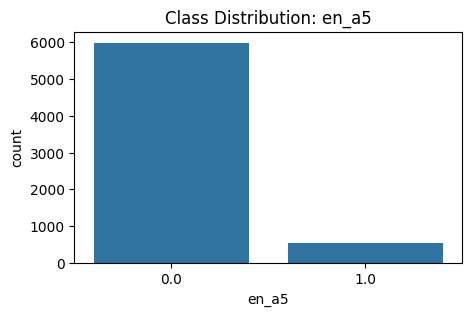


--- en_a6 ---
en_a6
0.0    5985
1.0     546
Name: count, dtype: int64


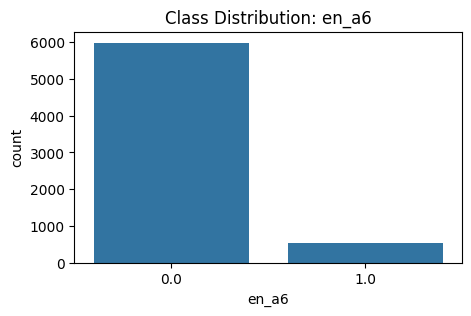

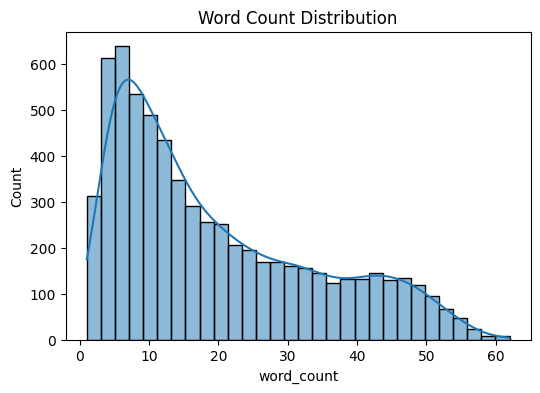

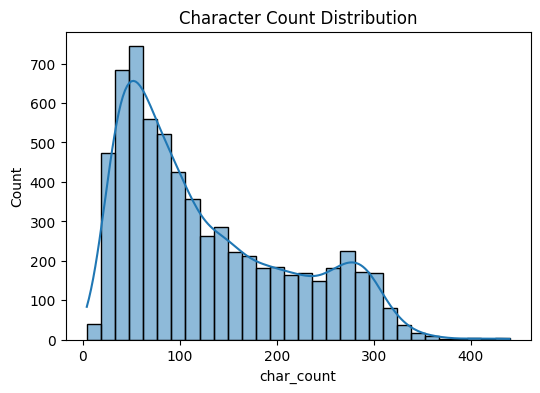

Avg stopwords per text: 6.8107487367937525


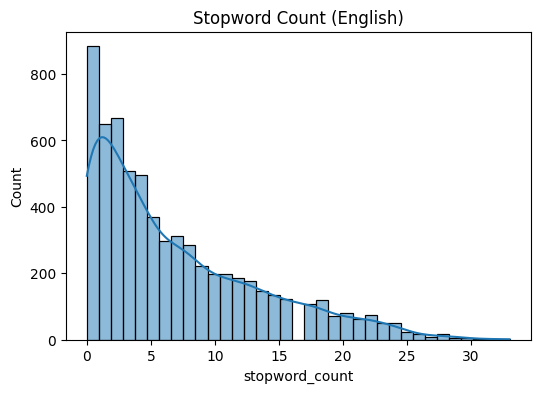

Exact duplicates: 0
Vocabulary size for EN: 23877

===== EDA for train_hi_l1.csv =====

Dataset shape: (6197, 7)

Data types:
 text     object
key      object
hi_a1    object
hi_a2    object
hi_a3    object
hi_a4    object
hi_a5    object
dtype: object

Memory usage:
 Index        132
text     2357879
key       415199
hi_a1     234011
hi_a2     222489
hi_a3     238156
hi_a4     238172
hi_a5     238614
dtype: int64

Sample rows:
                                                    text         key hi_a1  \
2319  <handle replaced>Bhut acche Geet kar the Geet ...  question_1   0.0   
4627  <handle replaced>यहाँ तो मानते नहीं हमें अपना ...  question_1   NaN   
74    #मौलाना_मोदी के #आरक्षण और  #Scstact ने सवर्ण ...  question_1   0.0   

     hi_a2 hi_a3 hi_a4 hi_a5  
2319   NaN   NaN   NaN   NaN  
4627   NaN   0.0   NaN   NaN  
74     NaN   NaN   NaN   NaN  

Missing values:
 text        0
key         0
hi_a1    4921
hi_a2    5332
hi_a3    4773
hi_a4    4773
hi_a5    4757
dtype: int64

Miss

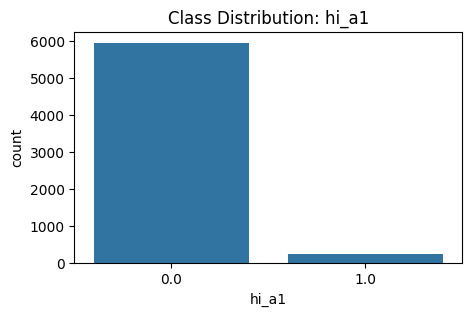


--- hi_a2 ---
hi_a2
0.0    5990
1.0     207
Name: count, dtype: int64


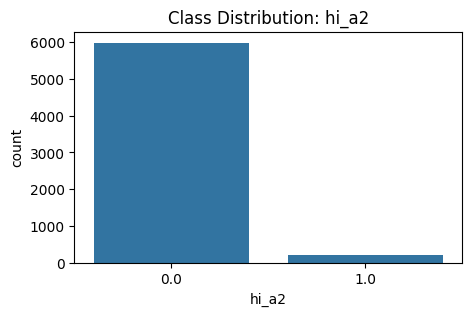


--- hi_a3 ---
hi_a3
0.0    5400
1.0     796
0.5       1
Name: count, dtype: int64


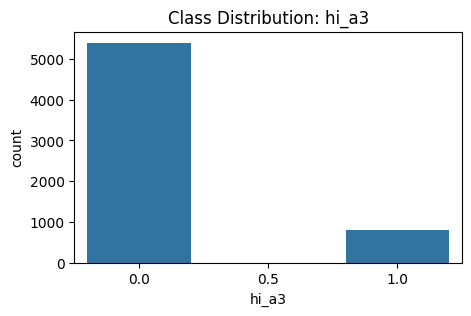


--- hi_a4 ---
hi_a4
0.0    6048
1.0     149
Name: count, dtype: int64


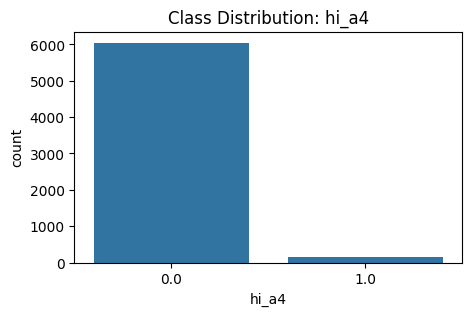


--- hi_a5 ---
hi_a5
0.0    5799
1.0     398
Name: count, dtype: int64


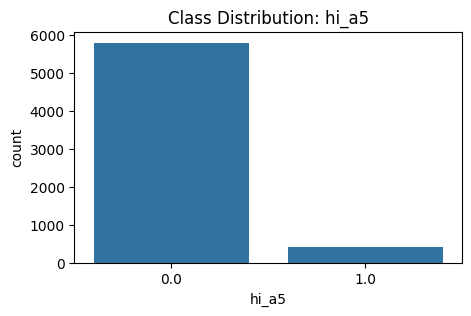

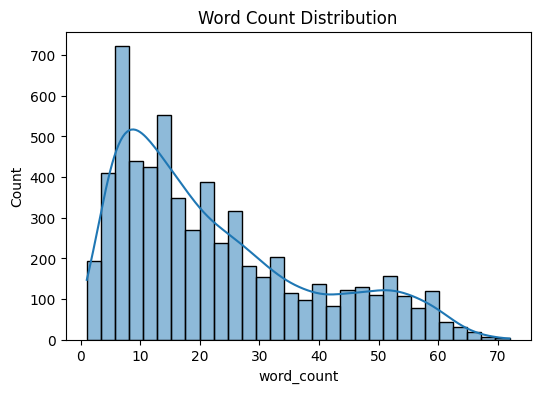

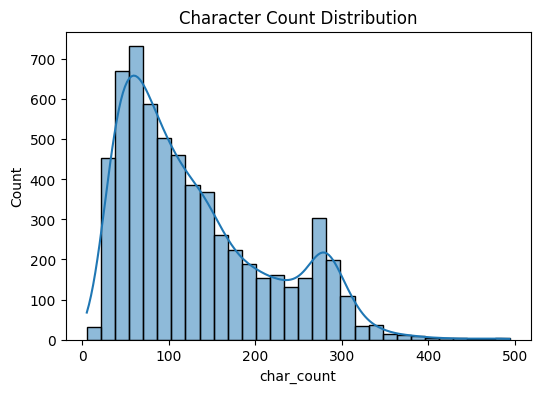

Total Devanagari chars: 387594
Exact duplicates: 0
Vocabulary size for HI: 27856

===== EDA for train_hi_l2.csv =====

Dataset shape: (6191, 7)

Data types:
 text     object
key      object
hi_a1    object
hi_a2    object
hi_a3    object
hi_a4    object
hi_a5    object
dtype: object

Memory usage:
 Index        132
text     2356010
key       414797
hi_a1     233792
hi_a2     222293
hi_a3     237814
hi_a4     237980
hi_a5     238394
dtype: int64

Sample rows:
                                                    text         key hi_a1  \
1231  <handle replaced><handle replaced>Gas Andhra b...  question_2   NaN   
1777  <handle replaced><handle replaced>दुःखद.. निंद...  question_2   NaN   
4857  <handle replaced>सत्य #ArnabGoswami के साथ है ...  question_2   NaN   

     hi_a2 hi_a3 hi_a4 hi_a5  
1231   NaN   1.0   NaN   NaN  
1777   NaN   NaN   0.0   NaN  
4857   NaN   NaN   1.0   NaN  

Missing values:
 text        0
key         0
hi_a1    4916
hi_a2    5326
hi_a3    4772
hi_a4    4767
h

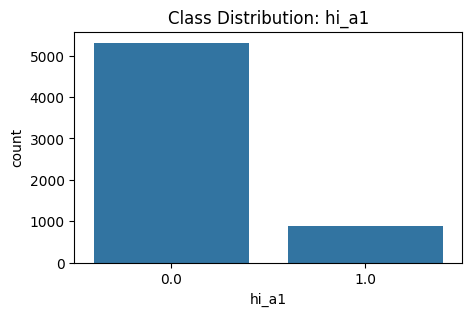


--- hi_a2 ---
hi_a2
0.0    5854
1.0     337
Name: count, dtype: int64


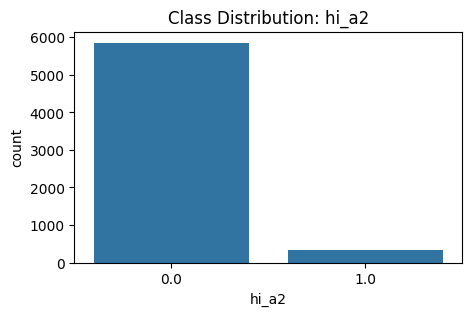


--- hi_a3 ---
hi_a3
0.0    5300
1.0     891
Name: count, dtype: int64


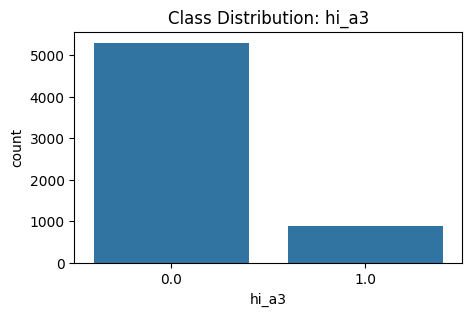


--- hi_a4 ---
hi_a4
0.0    6002
1.0     189
Name: count, dtype: int64


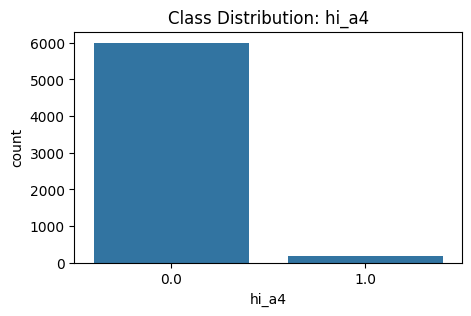


--- hi_a5 ---
hi_a5
0.0    5379
1.0     811
0.5       1
Name: count, dtype: int64


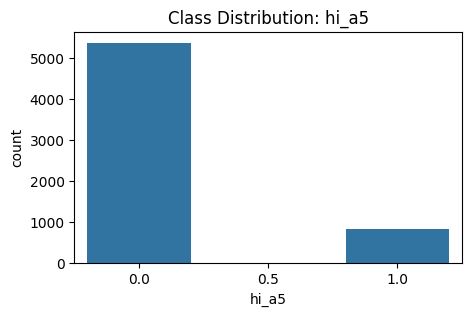

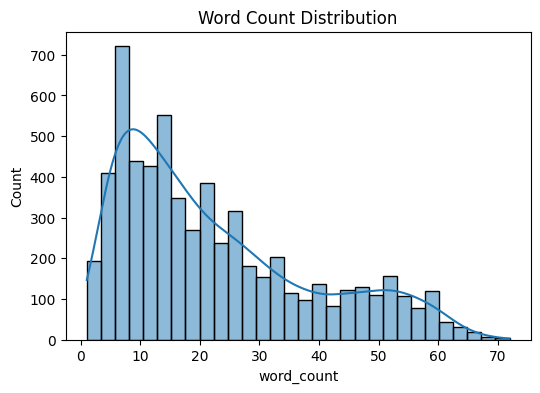

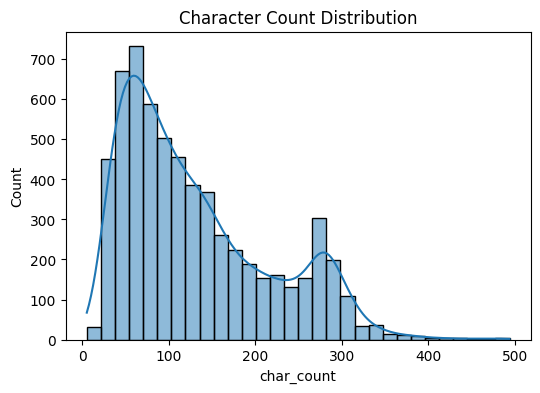

Total Devanagari chars: 387475
Exact duplicates: 0
Vocabulary size for HI: 27836

===== EDA for train_hi_l3.csv =====

Dataset shape: (6197, 7)

Data types:
 text     object
key      object
hi_a1    object
hi_a2    object
hi_a3    object
hi_a4    object
hi_a5    object
dtype: object

Memory usage:
 Index        132
text     2357927
key       415199
hi_a1     233984
hi_a2     222485
hi_a3     238190
hi_a4     238172
hi_a5     238586
dtype: int64

Sample rows:
                                                    text         key hi_a1  \
1274  <handle replaced><handle replaced>Ki Jhooti Ta...  question_3   NaN   
4355  <handle replaced>बहुत ही सुन्दर और आकर्षक है य...  question_3   NaN   
5746  पाइल्स का आपरेशन करते हुए डाक्टर ने मरीज़ को प...  question_3   1.0   

     hi_a2 hi_a3 hi_a4 hi_a5  
1274   NaN   NaN   NaN   0.0  
4355   NaN   1.0   NaN   NaN  
5746   NaN   NaN   NaN   NaN  

Missing values:
 text        0
key         0
hi_a1    4922
hi_a2    5332
hi_a3    4772
hi_a4    4773
h

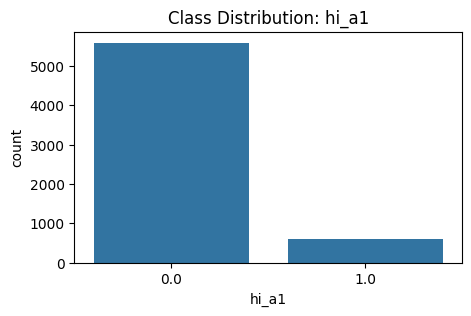


--- hi_a2 ---
hi_a2
0.0    5832
1.0     365
Name: count, dtype: int64


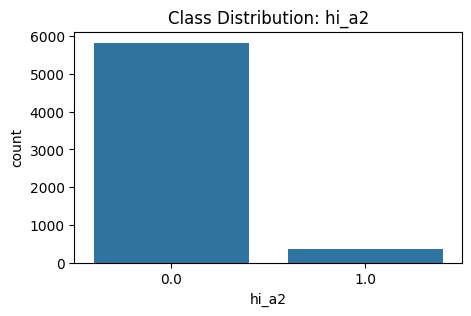


--- hi_a3 ---
hi_a3
0.0    5098
1.0    1099
Name: count, dtype: int64


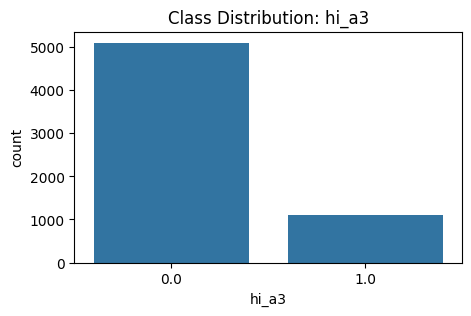


--- hi_a4 ---
hi_a4
0.0    5671
1.0     526
Name: count, dtype: int64


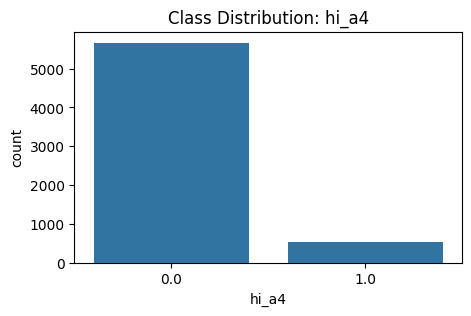


--- hi_a5 ---
hi_a5
0.0    5870
1.0     327
Name: count, dtype: int64


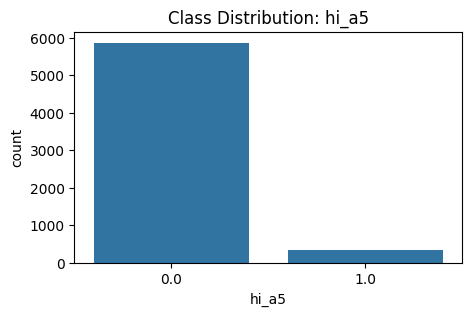

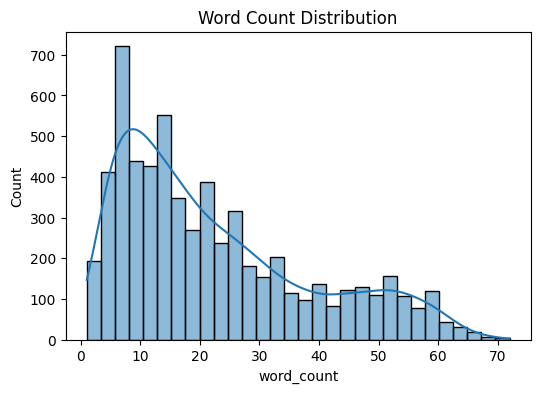

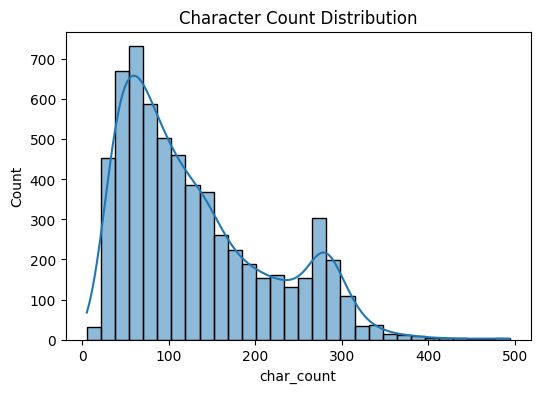

Total Devanagari chars: 387624
Exact duplicates: 0
Vocabulary size for HI: 27853

===== EDA for train_ta_l1.csv =====

Dataset shape: (6779, 8)

Data types:
 text      object
key       object
ta_a1    float64
ta_a2     object
ta_a3    float64
ta_a4    float64
ta_a5    float64
ta_a6     object
dtype: object

Memory usage:
 Index        132
text     2935904
key       454193
ta_a1      54232
ta_a2     260650
ta_a3      54232
ta_a4      54232
ta_a5      54232
ta_a6     223255
dtype: int64

Sample rows:
                                                    text         key  ta_a1  \
122                     2ஊம்பு ஊம்பு கொடுக்க சொல்றேன்..  question_1    NaN   
5884         தைப்பூசத்துக்கு கடை விடுமுறை யாம் blagards  question_1    0.0   
6412  முன்னால்  கௌரவ எம்.எஸ்.எஸ் அமீர் அலி பிரதி அமை...  question_1    NaN   

     ta_a2  ta_a3  ta_a4  ta_a5 ta_a6  
122    NaN    NaN    NaN    1.0   NaN  
5884   NaN    NaN    NaN    NaN   NaN  
6412   0.0    NaN    NaN    NaN   NaN  

Missing values:
 text

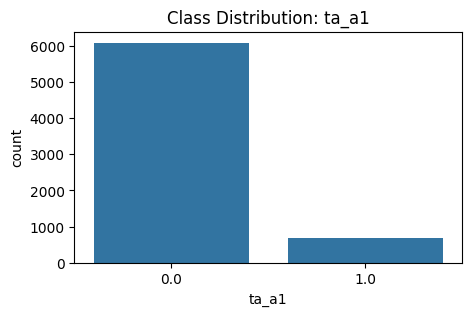


--- ta_a2 ---
ta_a2
0.000000    6177
1.000000     601
0.666667       1
Name: count, dtype: int64


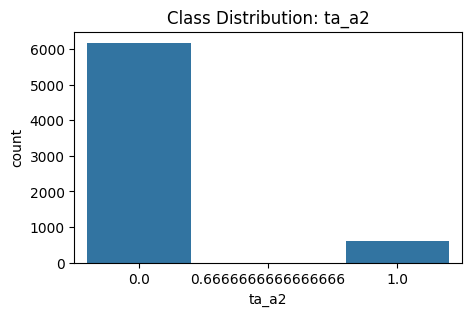


--- ta_a3 ---
ta_a3
0.0    5931
1.0     848
Name: count, dtype: int64


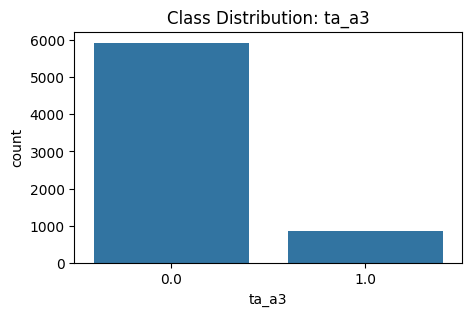


--- ta_a4 ---
ta_a4
0.00    6517
1.00     260
0.50       1
0.75       1
Name: count, dtype: int64


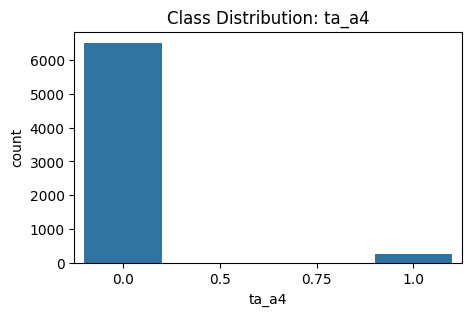


--- ta_a5 ---
ta_a5
0.0    5867
1.0     912
Name: count, dtype: int64


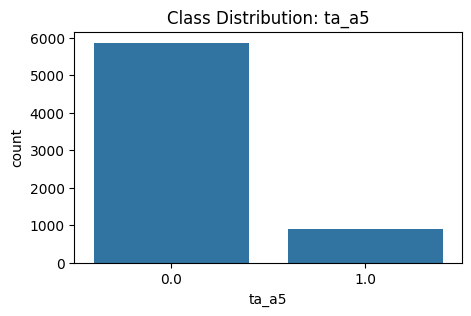


--- ta_a6 ---
ta_a6
0.0    6685
1.0      94
Name: count, dtype: int64


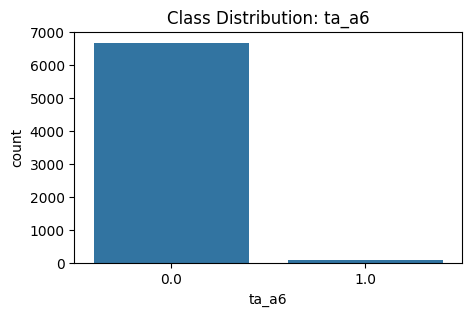

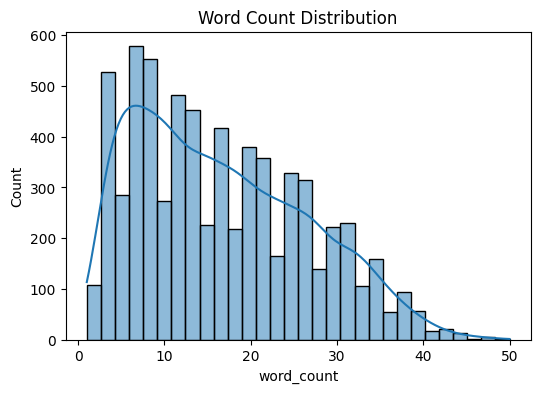

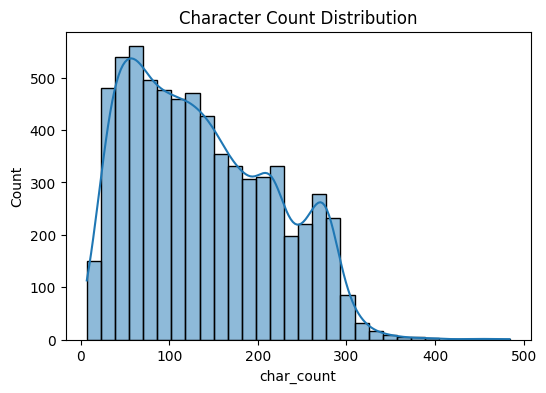

Total Tamil chars: 669259
Exact duplicates: 0
Vocabulary size for TA: 39908

===== EDA for train_ta_l2.csv =====

Dataset shape: (6778, 8)

Data types:
 text      object
key       object
ta_a1     object
ta_a2     object
ta_a3     object
ta_a4    float64
ta_a5    float64
ta_a6     object
dtype: object

Memory usage:
 Index        132
text     2935634
key       454126
ta_a1     260069
ta_a2     260602
ta_a3     256319
ta_a4      54224
ta_a5      54224
ta_a6     223223
dtype: int64

Sample rows:
                                                    text         key ta_a1  \
1279  <handle replaced><handle replaced>நீ இராமதாஸை ...  question_2   NaN   
727   <handle replaced><handle replaced><handle repl...  question_2   NaN   
2054  <handle replaced>உன் போன்ற தேவடியா மவன் விமர்ச...  question_2   1.0   

     ta_a2 ta_a3  ta_a4  ta_a5 ta_a6  
1279   NaN   1.0    NaN    NaN   NaN  
727    NaN   NaN    1.0    NaN   NaN  
2054   NaN   NaN    NaN    NaN   NaN  

Missing values:
 text        0
key

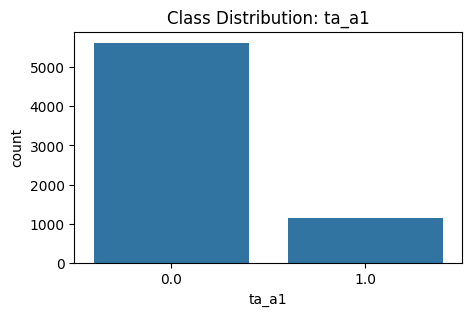


--- ta_a2 ---
ta_a2
0.0    5808
1.0     970
Name: count, dtype: int64


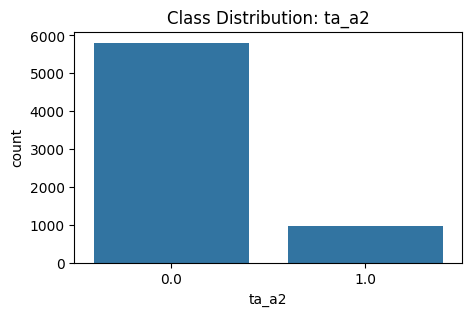


--- ta_a3 ---
ta_a3
0.0    5905
1.0     873
Name: count, dtype: int64


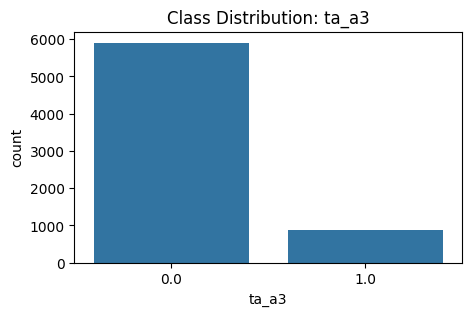


--- ta_a4 ---
ta_a4
0.0    6502
1.0     276
Name: count, dtype: int64


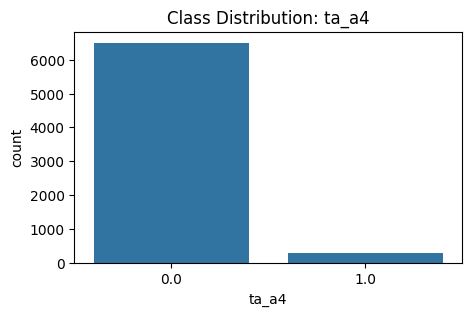


--- ta_a5 ---
ta_a5
0.0    6019
1.0     759
Name: count, dtype: int64


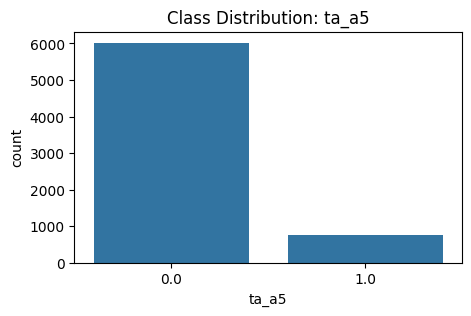


--- ta_a6 ---
ta_a6
0.0    6649
1.0     129
Name: count, dtype: int64


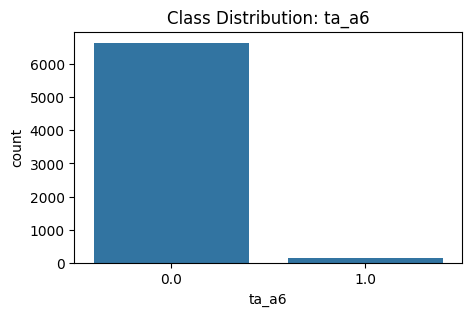

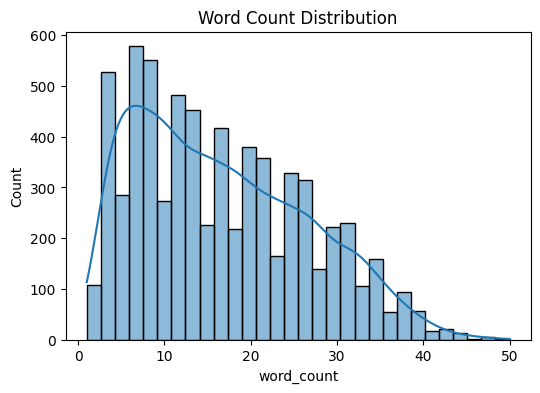

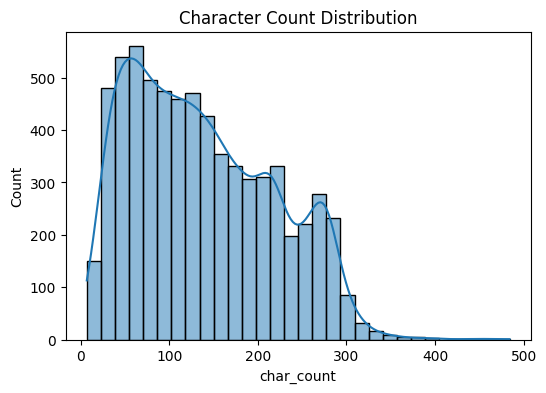

Total Tamil chars: 669224
Exact duplicates: 0
Vocabulary size for TA: 39907

===== EDA for train_ta_l3.csv =====

Dataset shape: (6779, 8)

Data types:
 text      object
key       object
ta_a1     object
ta_a2    float64
ta_a3    float64
ta_a4     object
ta_a5    float64
ta_a6     object
dtype: object

Memory usage:
 Index        132
text     2935904
key       454193
ta_a1     260125
ta_a2      54232
ta_a3      54232
ta_a4     261419
ta_a5      54232
ta_a6     223254
dtype: int64

Sample rows:
                                                    text         key ta_a1  \
2186  <handle replaced>என்னுடைய பதிவையும் சற்று பாரு...  question_3   NaN   
6194       புண்டை அறிப்பு இருக்கவ மட்டும் dm வா 😐😐😐😐😐😐😐  question_3   NaN   
5433  சிறுத்தை மணி உன் வாய் கோத்தா புண்டைக்கு என் சு...  question_3   NaN   

      ta_a2  ta_a3 ta_a4  ta_a5 ta_a6  
2186    0.0    NaN   NaN    NaN   NaN  
6194    NaN    1.0   NaN    NaN   NaN  
5433    NaN    NaN   1.0    NaN   NaN  

Missing values:
 text        0

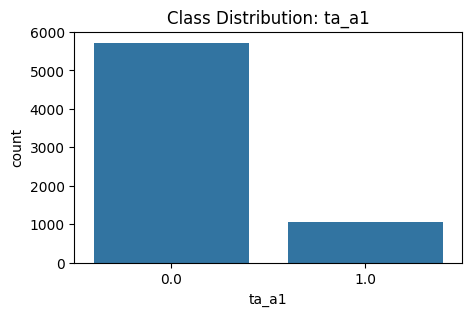


--- ta_a2 ---
ta_a2
0.0    5740
1.0    1039
Name: count, dtype: int64


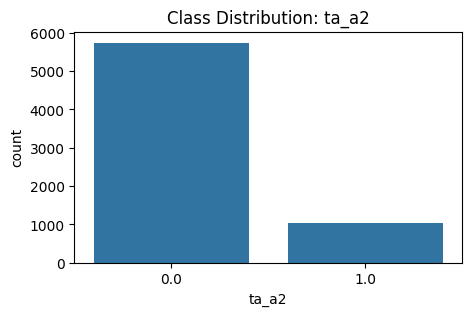


--- ta_a3 ---
ta_a3
0.0    5793
1.0     986
Name: count, dtype: int64


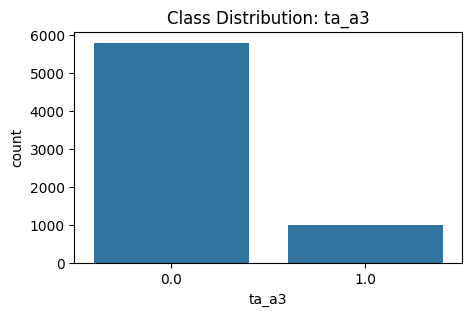


--- ta_a4 ---
ta_a4
0.0    6043
1.0     736
Name: count, dtype: int64


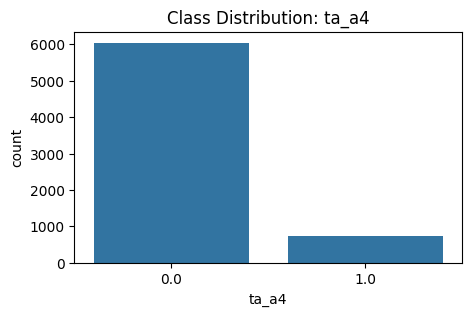


--- ta_a5 ---
ta_a5
0.0    5658
1.0    1121
Name: count, dtype: int64


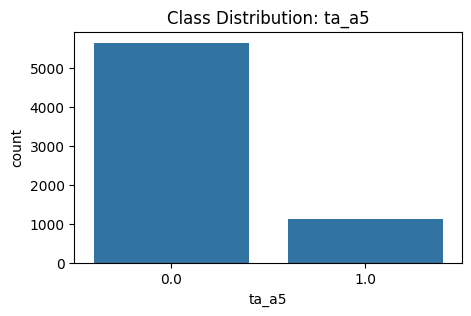


--- ta_a6 ---
ta_a6
0.0    6627
1.0     152
Name: count, dtype: int64


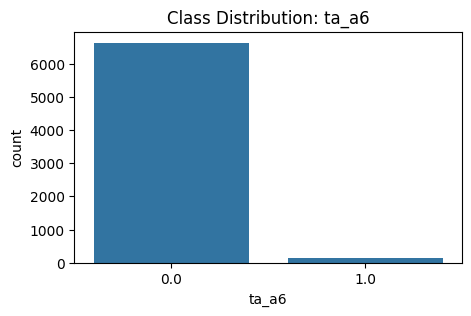

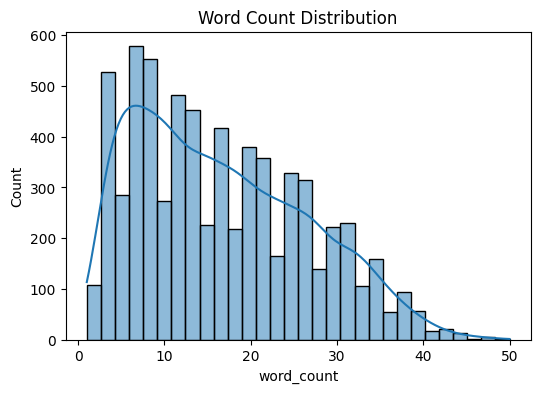

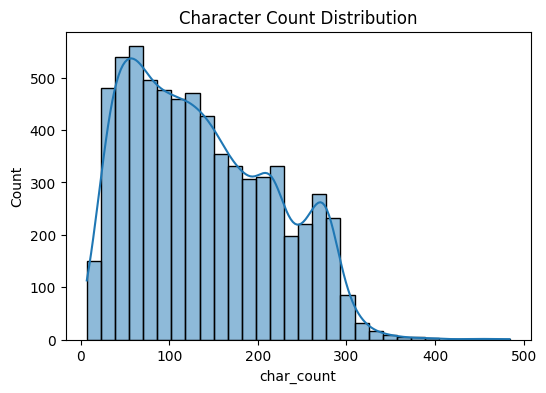

Total Tamil chars: 669259
Exact duplicates: 0
Vocabulary size for TA: 39908


In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import regex
from collections import defaultdict
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
def perform_eda(file_path, lang):
    print(f"\n===== EDA for {os.path.basename(file_path)} =====")
    df = pd.read_csv(file_path)
    print(f"\nDataset shape: {df.shape}")
    print("\nData types:\n", df.dtypes)
    print("\nMemory usage:\n", df.memory_usage(deep=True))
    print("\nSample rows:\n", df.sample(3))
    missing = df.isnull().sum()
    print("\nMissing values:\n", missing)
    print("\nMissing %:\n", (missing / len(df)) * 100)
    target_cols = [col for col in df.columns if col.startswith(lang + "_a")]
    df[target_cols] = df[target_cols].replace('NL', None).apply(pd.to_numeric, errors='coerce').fillna(0)

    for col in target_cols:
        print(f"\n--- {col} ---")
        print(df[col].value_counts(dropna=False))

        plt.figure(figsize=(5, 3))
        sns.countplot(data=df, x=col)
        plt.title(f"Class Distribution: {col}")
        plt.show()


    df['word_count'] = df['text'].apply(lambda x: len(str(x).split()))
    df['char_count'] = df['text'].apply(lambda x: len(str(x)))

    plt.figure(figsize=(6, 4))
    sns.histplot(df['word_count'], kde=True, bins=30)
    plt.title("Word Count Distribution")
    plt.show()

    plt.figure(figsize=(6, 4))
    sns.histplot(df['char_count'], kde=True, bins=30)
    plt.title("Character Count Distribution")
    plt.show()
    if lang == "en":
        eng_stopwords = set(stopwords.words('english'))
        df['stopword_count'] = df['text'].apply(
            lambda x: len([w for w in str(x).lower().split() if w in eng_stopwords])
        )
        print("Avg stopwords per text:", df['stopword_count'].mean())

        plt.figure(figsize=(6, 4))
        sns.histplot(df['stopword_count'], kde=True)
        plt.title("Stopword Count (English)")
        plt.show()

    if lang == "hi":
        script_chars = regex.findall(r'[\p{Devanagari}]', ' '.join(df['text']))
        print(f"Total Devanagari chars: {len(script_chars)}")
    elif lang == "ta":
        script_chars = regex.findall(r'[\p{Tamil}]', ' '.join(df['text']))
        print(f"Total Tamil chars: {len(script_chars)}")

    df['special_chars'] = df['text'].apply(lambda x: len(re.findall(r'[^\w\s]', str(x))))
    print("Exact duplicates:", df.duplicated().sum())

    vocab = set(word.lower() for text in df['text'] for word in str(text).split())
    print(f"Vocabulary size for {lang.upper()}: {len(vocab)}")

    return df

base_path = "/content/drive/MyDrive/uli_dataset-main/training"
file_langs = {
    "train_en_l1.csv": "en",
    "train_en_l2.csv": "en",
    "train_en_l3.csv": "en",
    "train_hi_l1.csv": "hi",
    "train_hi_l2.csv": "hi",
    "train_hi_l3.csv": "hi",
    "train_ta_l1.csv": "ta",
    "train_ta_l2.csv": "ta",
    "train_ta_l3.csv": "ta"
}

dfs = {}
for filename, lang in file_langs.items():
    file_path = os.path.join(base_path, filename)
    df = perform_eda(file_path, lang)
    dfs[filename] = df


Pre-Processing

In [ ]:
import os
import sys
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from collections import defaultdict
from nltk.corpus.reader import WordNetCorpusReader
import warnings

warnings.filterwarnings("ignore", category=RuntimeWarning)

import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('all')

!git clone https://github.com/anoopkunchukuttan/indic_nlp_library.git
!git clone https://github.com/anoopkunchukuttan/indic_nlp_resources.git

INDIC_NLP_LIB_PATH = "/content/indic_nlp_library"
INDIC_NLP_RESOURCES = "/content/indic_nlp_resources"
sys.path.append(INDIC_NLP_LIB_PATH)

from indicnlp import common
common.set_resources_path(INDIC_NLP_RESOURCES)

from indicnlp.tokenize import indic_tokenize
from indicnlp.normalize.indic_normalize import IndicNormalizerFactory
print("✅ Indic NLP Library loaded successfully!")

english_stopwords = {
    "a", "an", "the", "and", "in", "on", "of", "to", "for", "is", "was", "are", "were", "by", "with", "as", "that"
}
STOPWORDS = {
    "en": english_stopwords,
    "hi": {"के", "का", "की", "से", "में", "पर", "और", "को", "है", "यह", "भारत", "लेने", "वापस", "तीन", "किसान", "कानून", "बिल"},
    "ta": {"இந்த", "அது", "நாம்", "என்று", "மற்றும்", "இங்கு", "முரசொலி", "அலுவலகம்", "அமைந்துள்ள", "இடம்", "பஞ்சமி"}
}

def load_exception_list(filepath):
    exc_dict = defaultdict(set)
    if os.path.exists(filepath):
        with open(filepath, "r", encoding="utf-8") as f:
            for line in f:
                parts = line.strip().split()
                if len(parts) > 1:
                    exc_dict[parts[0]].update(parts[1:])
    return exc_dict

adj_exc = defaultdict(set)
adv_exc = defaultdict(set)

def lemmatize(word, pos="noun"):
    if pos == "adj" and word in adj_exc:
        return list(adj_exc[word])[0]
    elif pos == "adv" and word in adv_exc:
        return list(adv_exc[word])[0]
    return word

normalizer_factory = IndicNormalizerFactory()
hi_normalizer = normalizer_factory.get_normalizer("hi")
ta_normalizer = normalizer_factory.get_normalizer("ta")

def detect_language(filename):
    if "_en_" in filename:
        return "en"
    elif "_hi_" in filename:
        return "hi"
    elif "_ta_" in filename:
        return "ta"
    return "unknown"

def preprocess_text(text, lang):
    if not isinstance(text, str) or len(text) == 0:
        return ""

    text = text.lower()

    # Normalize
    if lang == "hi":
        text = hi_normalizer.normalize(text)
    elif lang == "ta":
        text = ta_normalizer.normalize(text)

    # Tokenize
    if lang == "en":
        tokens = word_tokenize(text)
    else:
        tokens = text.split()

    tokens = [word for word in tokens if word.isalnum() and word not in STOPWORDS.get(lang, set())]

    # Lemmatize English
    if lang == "en":
        tokens = [lemmatize(word, "adj") for word in tokens]

    return " ".join(tokens)


DATASET_PATH = "/content/drive/MyDrive/uli_dataset-main/training"

train_files = [
    "train_en_l1.csv", "train_en_l2.csv", "train_en_l3.csv",
    "train_hi_l1.csv", "train_hi_l2.csv", "train_hi_l3.csv",
    "train_ta_l1.csv", "train_ta_l2.csv", "train_ta_l3.csv"
]

processed_data = []
for file in train_files:
    file_path = os.path.join(DATASET_PATH, file)
    if not os.path.exists(file_path):
        print(f"⚠️ Skipping missing file: {file_path}")
        continue

    lang = detect_language(file)
    print(f"Processing file: {file} | Detected language: {lang}")

    df = pd.read_csv(file_path)

    if "text" in df.columns:
        df["clean_text"] = df["text"].apply(lambda x: preprocess_text(x, lang))

    if lang in ["hi", "ta"]:
        print(f"Sample preprocessed text for {lang}:")
        print(df[["text", "clean_text"]].head(2))
        print("\n")

    processed_data.append(df)

if processed_data:
    final_df = pd.concat(processed_data, ignore_index=True)
    final_df.to_csv("/content/preprocessed_data.csv", index=False)
    print("✅ Preprocessed data saved as 'preprocessed_data.csv'")
    print(final_df.head())
else:
    print("❌ No data was processed. Check file paths.")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_da

Cloning into 'indic_nlp_library'...
remote: Enumerating objects: 1404, done.
remote: Counting objects: 100% (185/185), done.
remote: Compressing objects: 100% (58/58), done.
remote: Total 1404 (delta 139), reused 152 (delta 124), pack-reused 1219 (from 1)
Receiving objects: 100% (1404/1404), 9.57 MiB | 10.04 MiB/s, done.
Resolving deltas: 100% (749/749), done.
Cloning into 'indic_nlp_resources'...
remote: Enumerating objects: 139, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 139 (delta 2), reused 2 (delta 0), pack-reused 126 (from 1)
Receiving objects: 100% (139/139), 149.77 MiB | 18.17 MiB/s, done.
Resolving deltas: 100% (53/53), done.
Updating files: 100% (28/28), done.
✅ Indic NLP Library loaded successfully!
Processing file: train_en_l1.csv | Detected language: en
Processing file: train_en_l2.csv | Detected language: en
Processing file: train_en_l3.csv | Detected language: en
Processing file: train_hi_l1.csv | De

In [ ]:
!pip install transformers

  Using cached transformers-4.51.2-py3-none-any.whl.metadata (38 kB)
  Using cached tokenizers-0.21.1-cp39-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.8 kB)
Using cached transformers-4.51.2-py3-none-any.whl (10.4 MB)
Using cached tokenizers-0.21.1-cp39-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (3.0 MB)
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.15.2
    Uninstalling tokenizers-0.15.2:
      Successfully uninstalled tokenizers-0.15.2


In [ ]:
import os
import re
import glob
import pandas as pd
import numpy as np
import torch
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from transformers import (
    AutoTokenizer, AutoModelForSequenceClassification,
    Trainer, TrainingArguments, DebertaV2ForSequenceClassification
)
from torch import nn
import nlpaug.augmented as nla
import nlpaug.flow as nlaf
import random

BASE_PATH = "/content/drive/MyDrive/uli_dataset-main"
OUTPUT_DIR = "./task2_multilingual"

MODEL_MAP = {
    'en': 'microsoft/deberta-v3-base',
    'hi': 'microsoft/deberta-v3-base',
    'ta': 'microsoft/deberta-v3-base'
}

EXTERNAL_DATA_PATHS = {
    'en': f'{BASE_PATH}/task2/train.csv',
    'hi': f'{BASE_PATH}/task2/hindi_2021.csv',
    'ta': f'{BASE_PATH}/task2/tamil_offensive_full_train.csv'
}

TARGET_DATA_PATHS = {
    'en': f'{BASE_PATH}/training/train_en_l.csv',
    'hi': f'{BASE_PATH}/training/train_hi_l.csv',
    'ta': f'{BASE_PATH}/training/train_ta_l.csv'
}

AUGMENTATION_CONFIG = {
    'en': {
        'synonym': nla.SynonymAug(aug_src='wordnet'),
        'swap': nla.RandomWordAug(action="swap"),
        'flow': nlaf.Sequential([
            nla.SynonymAug(aug_src='wordnet', aug_p=0.3),
            nla.RandomWordAug(action="swap", aug_p=0.2)
        ])
    },
    'hi': {
        'char_swap': nla.CharAug(action="swap", aug_char_p=0.1),
        'word_sub': nla.RandomWordAug(action="substitute", aug_p=0.2)
    },
    'ta': {
        'char_swap': nla.CharAug(action="swap", aug_char_p=0.1),
        'word_sub': nla.RandomWordAug(action="substitute", aug_p=0.2)
    }
}

def clean_text(text, lang):
    """Clean emoji data"""
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'#\w+', '', text)
    text = re.sub(r'https?://\S+', '', text)
    text = text.strip()
    if lang == 'hi':
        text = re.sub(r'[^\u0900-\u097F\s]', '', text)
    elif lang == 'ta':
        text = re.sub(r'[^\u0B80-\u0BFF\s]', '', text)
    return text

def augment_data(df, lang, aug_config, aug_ratio=0.5):
    augmented_texts = []
    augmented_labels = []

    for _, row in df.iterrows():
        text, label = row['text'], row['label']
        augmented_texts.append(text)
        augmented_labels.append(label)

        if label == 1 and random.random() < aug_ratio:
            aug = aug_config[lang]
            if lang == 'en':
                augmented_text = aug['flow'].augment(text)[0]
            else:
                augmented_text = aug['char_swap'].augment(text)[0]
            augmented_texts.append(augmented_text)
            augmented_labels.append(label)

    return pd.DataFrame({
        'text': augmented_texts,
        'label': augmented_labels
    })

def load_external_data(lang):
    path = EXTERNAL_DATA_PATHS[lang]

    if lang == 'en':
        df = pd.read_csv(path)
        df['label'] = (df[['toxic', 'severe_toxic']].sum(axis=1) > 0).astype(int)
        df = df[['comment_text', 'label']].rename(columns={'comment_text': 'text'})

    elif lang == 'hi':
        df = pd.read_csv(path, encoding='utf-8')
        df = df.rename(columns={'task_1': 'label'})
        df['label'] = df['label'].map({'HOF': 1, 'NOT': 0})
        df = df[['text', 'label']].dropna()

    elif lang == 'ta':
        data = []
        with open(path, 'r', encoding='utf-8') as f:
            for line in f:
                parts = line.strip().rsplit('\t', 1)
                if len(parts) == 2:
                    text, label = parts
                    data.append({'text': text, 'label': label})

        df = pd.DataFrame(data)
        df['label'] = (
            df['label']
            .str.strip()
            .str.lower()
            .str.replace(r'[^a-z_]', '', regex=True)
        )

        label_map = {
            'not_offensive': 0,
            'offensive_targeted_insult_individual': 1,
            'offensive_targeted_insult_group': 1,
            'offensive_untargeted': 1
        }

        df['label'] = df['label'].map(label_map)
        df = df.dropna(subset=['label'])
        df['label'] = df['label'].astype(int)

    df['text'] = df['text'].apply(lambda x: clean_text(x, lang))
    return augment_data(df, lang, AUGMENTATION_CONFIG)

def load_target_data(lang):
    files = glob.glob(TARGET_DATA_PATHS[lang])
    dfs = []

    for file in files:
        df = pd.read_csv(file)
        annot_cols = [f'{lang}_a1', f'{lang}_a2', f'{lang}_a3']
        df[annot_cols] = df[annot_cols].replace(['NL', 'nl', 'Nl', 'n/a'], 0)
        df[annot_cols] = df[annot_cols].apply(pd.to_numeric, errors='coerce').fillna(0)
        df['label'] = (df[annot_cols].mean(axis=1) >= 0.5).astype(int)
        df['text'] = df['text'].apply(lambda x: clean_text(x, lang))
        dfs.append(df[['text', 'label']])

    return augment_data(pd.concat(dfs).reset_index(drop=True), lang, AUGMENTATION_CONFIG)

class SafetyDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

class MultilingualModel(nn.Module):
    def __init__(self, base_model_name, num_labels=2):
        super().__init__()
        self.deberta = DebertaV2ForSequenceClassification.from_pretrained(
            base_model_name,
            num_labels=num_labels
        )
        self.lang_adapters = nn.ModuleDict({
            lang: nn.Linear(self.deberta.config.hidden_size, self.deberta.config.hidden_size)
            for lang in ['en', 'hi', 'ta']
        })

    def forward(self, input_ids, attention_mask=None, labels=None, lang=None):
        outputs = self.deberta(
            input_ids,
            attention_mask=attention_mask,
            output_hidden_states=True
        )

        hidden_states = outputs.hidden_states[-1][:, 0, :]
        adapted_hidden = self.lang_adapters[lang](hidden_states)
        logits = self.deberta.classifier(adapted_hidden)

        loss = None
        if labels is not None:
            loss_fct = nn.CrossEntropyLoss()
            loss = loss_fct(logits.view(-1, self.deberta.config.num_labels), labels.view(-1))

        return {'logits': logits, 'loss': loss}

def compute_metrics(p):
    preds = p.predictions.argmax(-1)
    return {
        'accuracy': accuracy_score(p.label_ids, preds),
        'f1': f1_score(p.label_ids, preds, zero_division=0)
    }

def run_multilingual_training():
    print(f"\n{'='*30} Multilingual Training {'='*30}")

    tokenizer = AutoTokenizer.from_pretrained('microsoft/deberta-v3-base')
    all_dfs = []
    for lang in ['en', 'hi', 'ta']:
        ext_df = load_external_data(lang)
        ext_df['lang'] = lang
        tgt_df = load_target_data(lang)
        tgt_df['lang'] = lang
        all_dfs.extend([ext_df, tgt_df])

    combined_df = pd.concat(all_dfs).reset_index(drop=True)

    train_df, val_df = train_test_split(
        combined_df,
        test_size=0.2,
        stratify=combined_df['label'],
        random_state=42
    )

    tokenization_args = {
        'truncation': True,
        'padding': 'max_length',
        'max_length': 128
    }

    train_enc = tokenizer(
        train_df['text'].tolist(),
        **tokenization_args
    )
    val_enc = tokenizer(
        val_df['text'].tolist(),
        **tokenization_args
    )

    train_dataset = SafetyDataset(train_enc, train_df['label'].values)
    val_dataset = SafetyDataset(val_enc, val_df['label'].values)
    model = MultilingualModel('microsoft/deberta-v3-base')
    training_args = TrainingArguments(
        output_dir=OUTPUT_DIR,
        num_train_epochs=3,
        per_device_train_batch_size=16,
        per_device_eval_batch_size=32,
        eval_strategy='epoch',
        save_strategy='epoch',
        fp16=True,
        logging_steps=50,
        report_to="none",
        disable_tqdm=False,
        logging_dir=f'{OUTPUT_DIR}/logs',
        load_best_model_at_end=True,
        metric_for_best_model='f1',
        learning_rate=2e-5,
        warmup_ratio=0.1
    )

    class CustomTrainer(Trainer):
        def compute_loss(self, model, inputs, return_outputs=False):
            labels = inputs.pop("labels")
            lang = inputs.pop("lang")
            outputs = model(**inputs, labels=labels, lang=lang)
            loss = outputs['loss']
            return (loss, outputs) if return_outputs else loss

    train_dataset.lang = train_df['lang'].values
    val_dataset.lang = val_df['lang'].values
    trainer = CustomTrainer(
        model=model,
        args=training_args,
        train_dataset=train_dataset,
        eval_dataset=val_dataset,
        compute_metrics=compute_metrics
    )

    trainer.train()

    model.save_pretrained(f"{OUTPUT_DIR}/final_model")
    tokenizer.save_pretrained(f"{OUTPUT_DIR}/final_model")
    print(f"\n{'='*30} Cross-Lingual Evaluation {'='*30}")
    for lang in ['en', 'hi', 'ta']:
        lang_val_df = val_df[val_df['lang'] == lang]
        lang_enc = tokenizer(
            lang_val_df['text'].tolist(),
            **tokenization_args
        )
        lang_dataset = SafetyDataset(lang_enc, lang_val_df['label'].values)
        lang_dataset.lang = lang_val_df['lang'].values

        eval_results = trainer.evaluate(lang_dataset)
        print(f"\n{lang.upper()} Evaluation Results:")
        print(f"Accuracy: {eval_results['eval_accuracy']:.4f}")
        print(f"F1 Score: {eval_results['eval_f1']:.4f}")

if __name__ == "__main__":
    os.makedirs(OUTPUT_DIR, exist_ok=True)
    run_multilingual_training()
    torch.cuda.empty_cache()


============================== Pretraining HI ==============================

Hindi Class Distribution:
label
0    3161
1    1433
Name: count, dtype: int64


Some weights of AlbertForSequenceClassification were not initialized from the model checkpoint at ai4bharat/indic-bert and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.539600,0.550691,0.687704,0.000000
2,0.501900,0.531191,0.731230,0.334232



============================== Pretraining TA ==============================
Raw label counts:
label
Not_offensive                           25425
Offensive_Untargetede                    2906
Offensive_Targeted_Insult_Group          2557
Offensive_Targeted_Insult_Individual     2343
not-Tamil                                1454
Offensive_Targeted_Insult_Other           454
Name: count, dtype: int64

Final label distribution:
label
0    25425
1     4900
Name: count, dtype: int64


Some weights of AlbertForSequenceClassification were not initialized from the model checkpoint at ai4bharat/indic-bert and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.370300,0.355177,0.838417,0.000000
2,0.283000,0.332127,0.847815,0.410224



============================== Pretraining EN ==============================


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.094600,0.090829,0.968761,0.827359
2,0.072700,0.086645,0.969795,0.842535
